In [1]:
import sys
import os

sys.path.insert(0, os.path.abspath("."))
sys.path.append(os.path.abspath("../../"))

In [2]:
import jax

jax.config.update("jax_compilation_cache_dir", "../jax-caches")
jax.config.update("jax_persistent_cache_min_entry_size_bytes", -1)
jax.config.update("jax_persistent_cache_min_compile_time_secs", 0)

# from desc import set_device
# set_device("gpu")

In [3]:
import numpy as np
np.set_printoptions(linewidth=np.inf, precision=4, suppress=True, threshold=sys.maxsize)
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import functools
import scipy

In [4]:
import desc

from desc.basis import *
from desc.backend import *
from desc.compute import *
from desc.coils import *
from desc.equilibrium import *
from desc.examples import *
from desc.grid import *
from desc.geometry import *

from desc.objectives import *
from desc.objectives.objective_funs import *
from desc.objectives.getters import *
from desc.objectives.normalization import *
from desc.objectives.utils import *
from desc.optimize._constraint_wrappers import *

from desc.transform import Transform
from desc.plotting import *
from desc.optimize import *
from desc.perturbations import *
from desc.profiles import *
from desc.compat import *
from desc.utils import *
from desc.magnetic_fields import *

from desc.__main__ import *
from desc.vmec_utils import *
from desc.input_reader import *
from desc.continuation import *

print_backend_info()

DESC version=0.14.2+167.ga620ee5d8.dirty.
Using JAX backend: jax version=0.6.2, jaxlib version=0.6.2, dtype=float64.
Using device: CPU, with 6.53 GB available memory.


In [5]:
from desc.optimize.utils import compute_jac_scale

In [6]:
eq = get("precise_QA")
# eq.change_resolution(M=4,M_grid=10,N=4,N_grid=10)
eqcho = eq.copy()
eqcho.set_initial_guess()

In [7]:
eqqr = desc.io.load("eq_qr.h5")
eqsvd = desc.io.load("eq_svd.h5")

In [8]:
grid = ConcentricGrid(L=eq.L_grid, M=eq.M_grid, N=eq.N_grid, NFP=eq.NFP, sym=eq.sym)
transformR = Transform(grid=grid, basis=eq.R_basis, method="direct1")
A = transformR.matrices["direct1"][0][0][0]
P = jnp.concatenate([A, A], axis=0)
Pinv = jnp.linalg.pinv(P)
eqcho.solve(
    maxiter=100, 
    ftol=1e-3, 
    verbose=3, 
    options={
        "tr_method": "precond", 
        "Pinv": Pinv, 
        "initial_trust_radius": 113.2282396734883,
        },
    );

Building objective: force
Precomputing transforms
Timer: Precomputing transforms = 380 ms
Timer: Objective build = 685 ms
Building objective: lcfs R
Building objective: lcfs Z
Building objective: fixed Psi
Building objective: fixed pressure
Building objective: fixed current
Building objective: fixed sheet current
Building objective: self_consistency R
Building objective: self_consistency Z
Building objective: lambda gauge
Building objective: axis R self consistency
Building objective: axis Z self consistency
Timer: Objective build = 539 ms
Timer: LinearConstraintProjection build = 2.69 sec
Number of parameters: 856
Number of objectives: 5346
Timer: Initializing the optimization = 3.97 sec

Starting optimization
Using method: lsq-exact
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1          2.989e-01                                    1.061e-02   
113.2282396734883
       1              2          1.274e-02      2.862e-

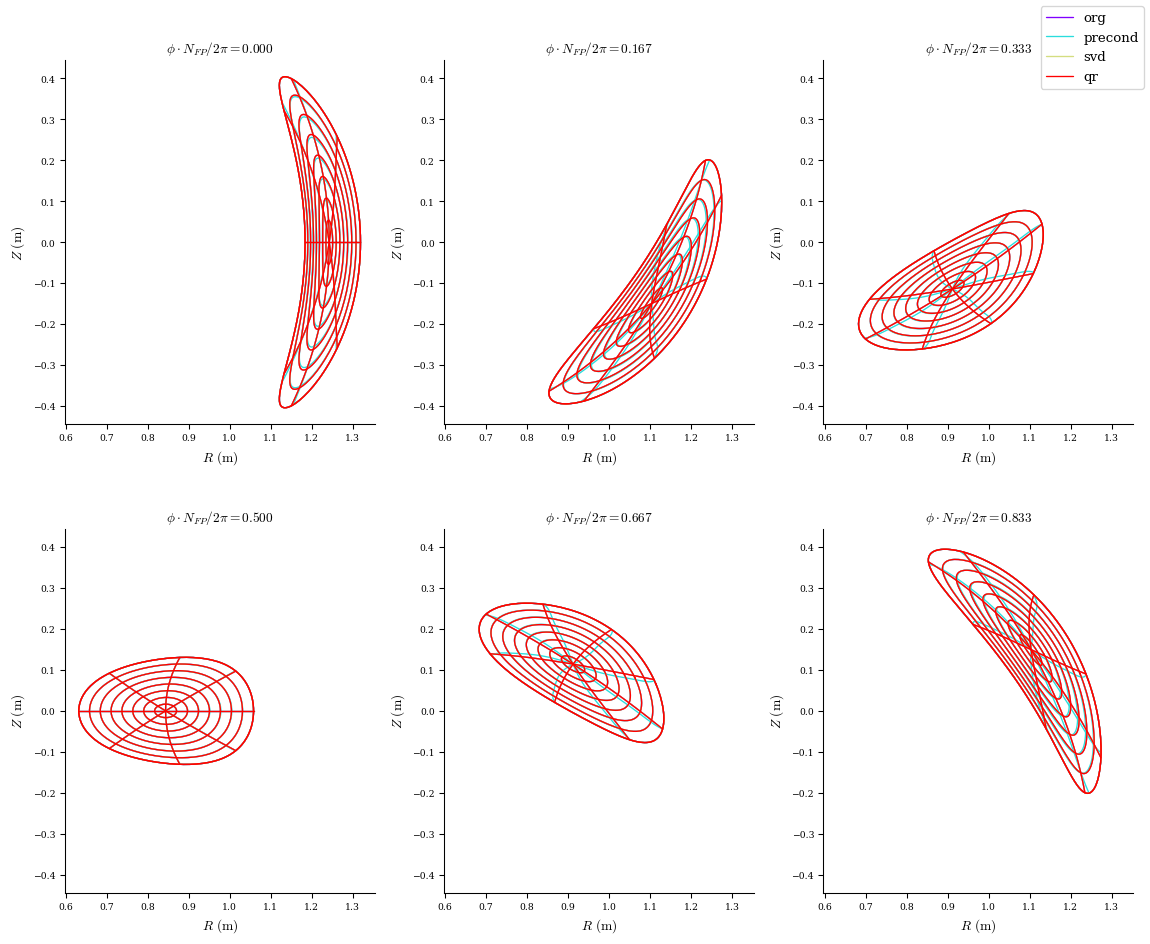

In [9]:
plot_comparison([eq, eqcho, eqsvd, eqqr], labels=["org", "precond", "svd", "qr"]);

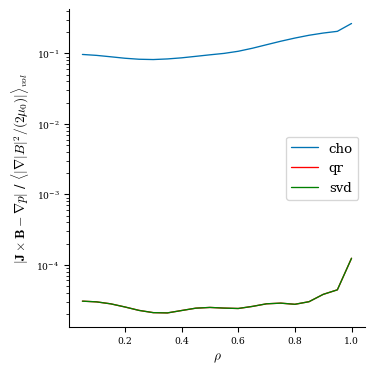

In [10]:
fig,ax = plot_fsa(eqcho, "|F|",norm_F=True,log=True,label="cho")
plot_fsa(eqqr, "|F|",norm_F=True,log=True,ax=ax,linecolor="r",label="qr")
plot_fsa(eqsvd, "|F|",norm_F=True,log=True,ax=ax,linecolor="g",label="svd")

ax.legend()

In [11]:
eqsvd = eq.copy()
eqsvd.set_initial_guess()
eqsvd.solve(maxiter=5, ftol=1e-3, verbose=3, options={"tr_method": "svd"});

Building objective: force
Precomputing transforms
Timer: Precomputing transforms = 103 ms
Timer: Objective build = 121 ms
Building objective: lcfs R
Building objective: lcfs Z
Building objective: fixed Psi
Building objective: fixed pressure
Building objective: fixed current
Building objective: fixed sheet current
Building objective: self_consistency R
Building objective: self_consistency Z
Building objective: lambda gauge
Building objective: axis R self consistency
Building objective: axis Z self consistency
Timer: Objective build = 136 ms
Timer: LinearConstraintProjection build = 2.20 sec
Number of parameters: 856
Number of objectives: 5346
Timer: Initializing the optimization = 2.52 sec

Starting optimization
Using method: lsq-exact
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1          2.989e-01                                    3.354e-01   
113.2368367277163
       1              2          2.567e-02      2.732e-